In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# absolute path
# df = pd.read_csv("C:\\Users\\ofaru\\git yeni\\eurotech\\adult.csv")

In [4]:
print('it\'s \t great')

it's 	 great


In [5]:

os.getcwd()

'C:\\Users\\pc\\git\\jupy\\eurotech\\kaggle'

In [6]:
# relative path
df = pd.read_csv("../adult.csv")

In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df["age"] == "?"

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: age, Length: 32561, dtype: bool

In [10]:
df.loc[df["age"] == "?"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [11]:
df[df == "?"] = np.nan

In [12]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [13]:
df["workclass"].value_counts(dropna=False)

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [14]:
df["workclass"].mode()

0    Private
Name: workclass, dtype: object

In [15]:
type(df["workclass"].mode())

pandas.core.series.Series

In [16]:
df["workclass"].mode()[0]

'Private'

In [17]:
df["workclass"].fillna(df["workclass"].mode()[0])

0        Private
1        Private
2        Private
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object

In [18]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [19]:
# df["workclass"] = df["workclass"].fillna(df["workclass"].mode()[0])

In [20]:
df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)

In [21]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [22]:
df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)

In [23]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [24]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [25]:
df["age"]

0        90
1        82
2        66
3        54
4        41
         ..
32556    22
32557    27
32558    40
32559    58
32560    22
Name: age, Length: 32561, dtype: int64

In [26]:
def agecat(age):
    if age < 18:
        return "0-17"
    elif 18 <= age < 30:
        return "18-30"
    elif 30 <= age < 40 :
        return "30-39"
    elif 40 <= age < 50:
        return "40-49"
    elif 50 <= age < 60:
        return "50-59"
    else :
        return "60+"
    
        

In [27]:
agecat(40)

'40-49'

In [28]:
# apply to series

In [29]:
df["agecategory"] = df["age"].apply(agecat)

In [30]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,agecategory
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,60+
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,60+
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,60+
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,50-59
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,40-49


In [31]:
# change "K" to "000"  for income column

In [32]:
def changeK(a):
    b= a.replace("K",".000")
    return b 

In [33]:
changeK("<=50K")

'<=50.000'

In [34]:
##  df["income"]= df["income"].apply(changeK)

In [35]:
df["income"].str.replace("<","?")

0        ?=50K
1        ?=50K
2        ?=50K
3        ?=50K
4        ?=50K
         ...  
32556    ?=50K
32557    ?=50K
32558     >50K
32559    ?=50K
32560    ?=50K
Name: income, Length: 32561, dtype: object

In [36]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,agecategory
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,60+
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,60+
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,60+
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,50-59
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,40-49


# ödev : age kategoriyi loc ile  oluştur

In [37]:
df["income"].value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [38]:
import seaborn as sns


<Axes: xlabel='count', ylabel='income'>

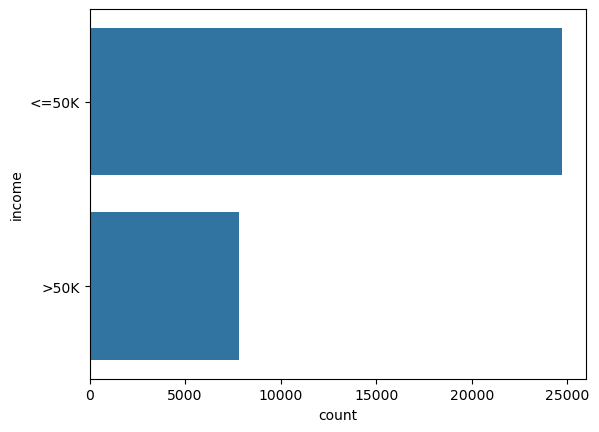

In [39]:
sns.countplot(df["income"])